## Zadanie: model kalsyfikacji
Stwórz model klasyfikacji, w oparciu o architekturę sieci neuronowych. Naucz model klasyfikować gatunki kwiatów, wykorzystując zbiór Iris. Pamiętaj, że jest to klasyfikacja wieloklasowa, w związku z tym w ostatniej warstwie sieci powinna być funkcja aktywacji Softmax.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [5]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [8]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['variety'], random_state = 42)
train.groupby('variety').size()

variety
Setosa        30
Versicolor    30
Virginica     30
dtype: int64

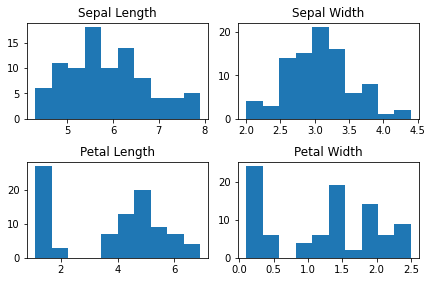

In [10]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal.length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal.width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal.length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal.width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

fig.tight_layout(pad=1.0);

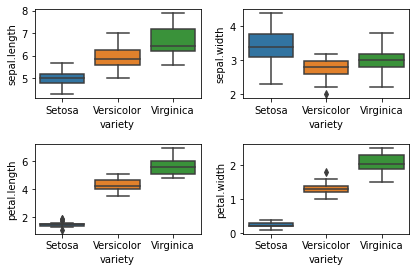

In [27]:
fig, axis = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Setosa', 'Versicolor', 'Virginica']
sns.boxplot(x = 'variety', y = 'sepal.length', data = train, order = cn, ax = axis[0,0]);
sns.boxplot(x = 'variety', y = 'sepal.width', data = train, order = cn, ax = axis[0,1]);
sns.boxplot(x = 'variety', y = 'petal.length', data = train, order = cn, ax = axis[1,0]);
sns.boxplot(x = 'variety', y = 'petal.width', data = train,  order = cn, ax = axis[1,1]);

fig.tight_layout(pad=1.5);

c:\users\cezary kaźmierczak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cezary kaźmierczak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cezary kaźmierczak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

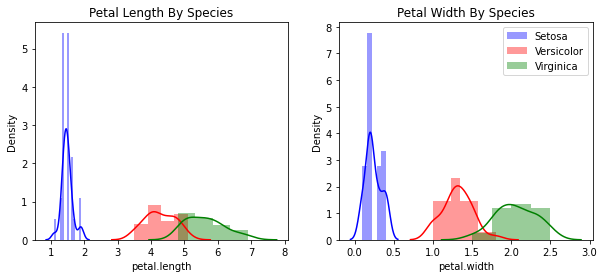

In [36]:
setosa_pl = train.loc[train.variety=='Setosa', 'petal.length']
versicolor_pl = train.loc[train.variety=='Versicolor', 'petal.length']
virginica_pl = train.loc[train.variety=='Virginica', 'petal.length']
setosa_pw = train.loc[train.variety=='Setosa', 'petal.width']
versicolor_pw = train.loc[train.variety=='Versicolor', 'petal.width']
virginica_pw = train.loc[train.variety=='Virginica', 'petal.width']

fig, axis = plt.subplots(1, 2)
 
fig.set_size_inches(10,4)
# ax1 = sns.histplot(setosa_pl, color="blue", label="Setosa", ax = axis[0]);
# ax1.set_title('Petal Length By Species')
# ax1 = sns.histplot(versicolor_pl, color="red", label="Versicolor", ax = axis[0]);
# ax1 = sns.histplot(virginica_pl, color="green", label="Virginica", ax = axis[0]);

# ax2 = sns.histplot(setosa_pw, color="blue", label="Setosa", ax = axis[1]);
# ax2.set_title('Petal Width By Species')
# ax2 = sns.histplot(versicolor_pw, color="red", label="Versicolor", ax = axis[1]);
# ax2 = sns.histplot(virginica_pw, color="green", label="Virginica", ax = axis[1]);
ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axis[0]);
ax1.set(title='Petal Length By Species')
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axis[0]);
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axis[0]);

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axis[1]);
ax2.set(title='Petal Width By Species')
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axis[1]);
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axis[1]);

plt.legend();

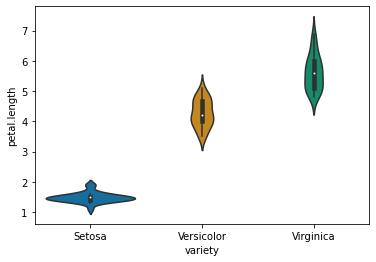

In [38]:
sns.violinplot(x="variety", y="petal.length", data=train, size=5, order = cn, palette = 'colorblind');

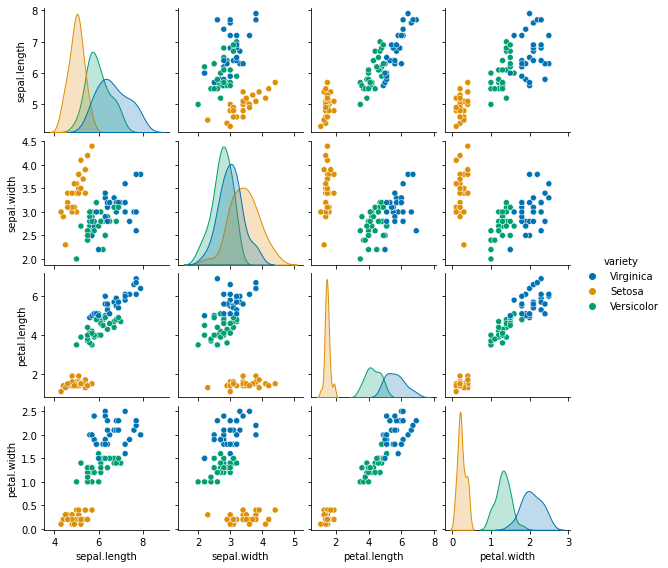

In [39]:
sns.pairplot(train, hue="variety", height = 2, palette = 'colorblind');

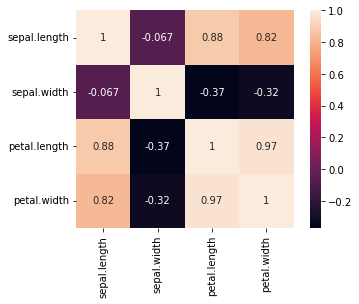

In [40]:
# correlation
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

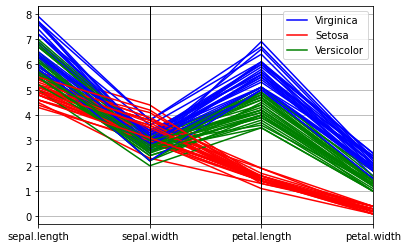

In [41]:
parallel_coordinates(train, "variety", color = ['blue', 'red', 'green']);

In [42]:
# model

X_train = train[['sepal.length','sepal.width','petal.length','petal.width']]
y_train = train.variety
X_test = test[['sepal.length','sepal.width','petal.length','petal.width']]
y_test = test.variety

In [43]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of Decision Tree is',"{:.4f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of Decision Tree is 0.9833


In [44]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

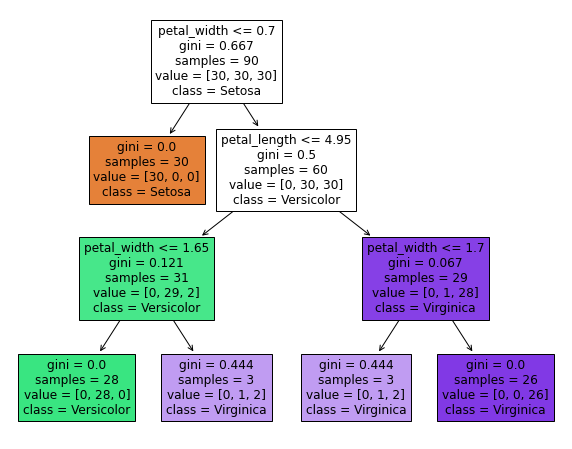

In [45]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

c:\users\cezary kaźmierczak\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


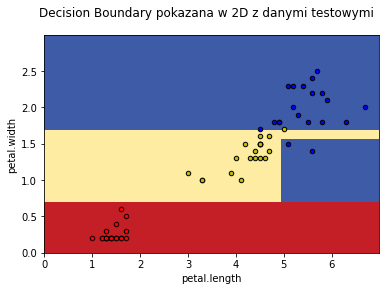

In [47]:
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal.length", "petal.width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'Setosa':0,'Versicolor':1,'Virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

 
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary pokazana w 2D z danymi testowymi")
plt.axis("tight");

Text(0.5, 1.0, 'Decision Tree Confusion matrix, bez normalizacji')

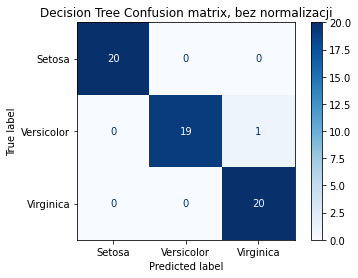

In [55]:
# disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
#                                  display_labels=cn,
#                                  cmap=plt.cm.Blues,
#                                  normalize=None)
# disp.ax_.set_title('Decision Tree Confusion matrix, bez normalizacji')

# disp = metrics.ConfusionMatrixDisplay.from_predictions(mod_dt, X_test, y_test,
#                                  display_labels=cn,
#                                  cmap=plt.cm.Blues,
#                                  normalize=None)
# disp.ax_.set_title('Decision Tree Confusion matrix, bez normalizacji')

disp = metrics.ConfusionMatrixDisplay.from_estimator(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, bez normalizacji')

In [58]:
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print('Dokładność Gaussowskiego naiwnego Bayes klasyfikatora dla danych testowych wynosi:',"{:.4f}".format(metrics.accuracy_score(y_pred,y_test)))

Dokładność Gaussian Naive Bayes klasyfikatora dla danych testowych wynosi: 0.9333


In [59]:
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('Dokładność Gaussowskiego naiwnego Bayes klasyfikatora z dwoma predykatorami dla danych testowych wynosi:',"{:.4f}".format(metrics.accuracy_score(y_pred,y_test)))

Dokładność Gaussowskiego naiwnego Bayes klasyfikatora z dwoma predykatorami dla danych testowych wynosi: 0.9500


In [65]:
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('Dokładność klasyfikatora LDA dla danych testowych wynosi:',"{:.4f}".format(metrics.accuracy_score(y_pred,y_test)))

Dokładność klasyfikatora LDA dla danych testowych wynosi: 0.9833


In [62]:
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('Dokładnoś klasyfikatora LDA z 2 predykatorami dla danych testowych wynosi:',"{:.4f}".format(metrics.accuracy_score(y_pred,y_test)))

Dokładnoś klasyfikatora LDA z 2 predykatorami dla danych testowych wynosi: 0.9333


In [66]:
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('Dokładność klasyfikatora QDA dla danych testowych wynosi:',"{:.4f}".format(metrics.accuracy_score(y_pred,y_test)))

Dokładność klasyfikatora QDA dla danych testowych wynosi: 0.9833


In [67]:
mod_qda = QuadraticDiscriminantAnalysis()
y_pred = mod_qda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('Dokładność klasyfikatora QDA dla danych testowych z 2 predykatorami wynosi:',"{:.4f}".format(metrics.accuracy_score(y_pred,y_test)))

Dokładność klasyfikatora QDA dla danych testowych z 2 predykatorami wynosi: 0.9667


In [68]:
# KNN, próba pierwszych 5
mod_5nn=KNeighborsClassifier(n_neighbors=5) 
mod_5nn.fit(X_train,y_train)
prediction=mod_5nn.predict(X_test)
print('Dokładnosć 5NN klasyfikatora wynosi:',"{:.4f}".format(metrics.accuracy_score(prediction,y_test)))

Dokładnosć 5NN klasyfikatora wynosi: 0.9333


C:\Users\CEZARY~1\AppData\Local\Temp/ipykernel_9292/1517515870.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy = accuracy.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
C:\Users\CEZARY~1\AppData\Local\Temp/ipykernel_9292/1517515870.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy = accuracy.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
C:\Users\CEZARY~1\AppData\Local\Temp/ipykernel_9292/1517515870.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy = accuracy.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
C:\Users\CEZARY~1\AppData\Local\Temp/ipykernel_9292/1517515870.py:6: FutureWarning: The series.append method is deprecated and will be removed

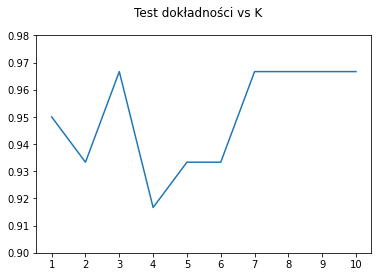

In [81]:
accuracy = pd.Series(dtype = 'float')
for i in list(range(1,11)):
    mod_knn=KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train,y_train)
    prediction=mod_knn.predict(X_test)
    accuracy = accuracy.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
    
plt.plot(list(range(1,11)), accuracy)
plt.suptitle("Test dokładności vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
network.add(layers.Dense(3, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

network.fit(X_train, train_labels, epochs=20, batch_size=40)

test_loss, test_acc = network.evaluate(X_test, test_labels)

print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)